In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

###Loading the diabetes dataset

In [2]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes.csv')

### Setting seed for reproducibility

In [3]:
# Set seed for reproducibility
np.random.seed(42)

### Random sample of 25 observations

In [4]:
sample = diabetes_data.sample(25)
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

### Population statistics

In [5]:
population_mean_glucose = diabetes_data['Glucose'].mean()
population_max_glucose = diabetes_data['Glucose'].max()

###Comparison chart for mean and max glucose

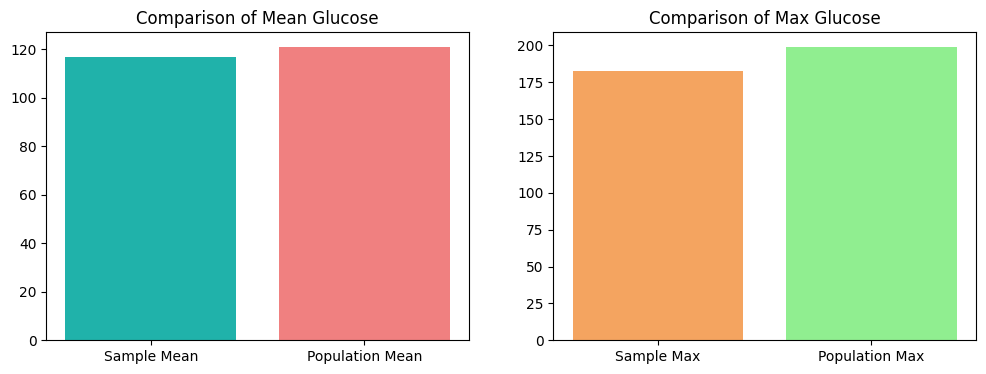

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].bar(['Sample Mean', 'Population Mean'], [sample_mean_glucose, population_mean_glucose], color=['lightseagreen', 'lightcoral'])
ax[0].set_title('Comparison of Mean Glucose')
ax[1].bar(['Sample Max', 'Population Max'], [sample_max_glucose, population_max_glucose], color=['sandybrown', 'lightgreen'])
ax[1].set_title('Comparison of Max Glucose')
plt.show()

###Calculating the 98th percentile of the 'BMI'

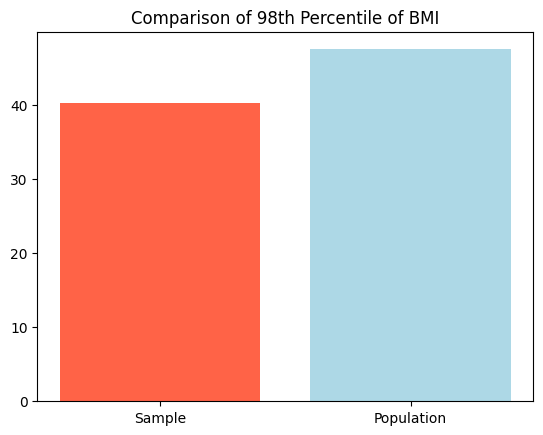

In [34]:
sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

# Create comparison chart for 98th percentile of BMI
plt.bar(['Sample', 'Population'], [sample_percentile_bmi, population_percentile_bmi], color=['tomato', 'lightblue'])
plt.title('Comparison of 98th Percentile of BMI')
plt.show()

###Bootstrap sampling

In [12]:
n_bootstrap_samples = 500
bootstrap_sample_size = 150

bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = resample(diabetes_data['BloodPressure'], replace=True, n_samples=bootstrap_sample_size)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_std_devs.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 95))

###Population statistics for BloodPressure

In [13]:
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_dev_bp = diabetes_data['BloodPressure'].std()
population_percentile_bp = np.percentile(diabetes_data['BloodPressure'], 95)

###Comparison charts for bootstrap statistics

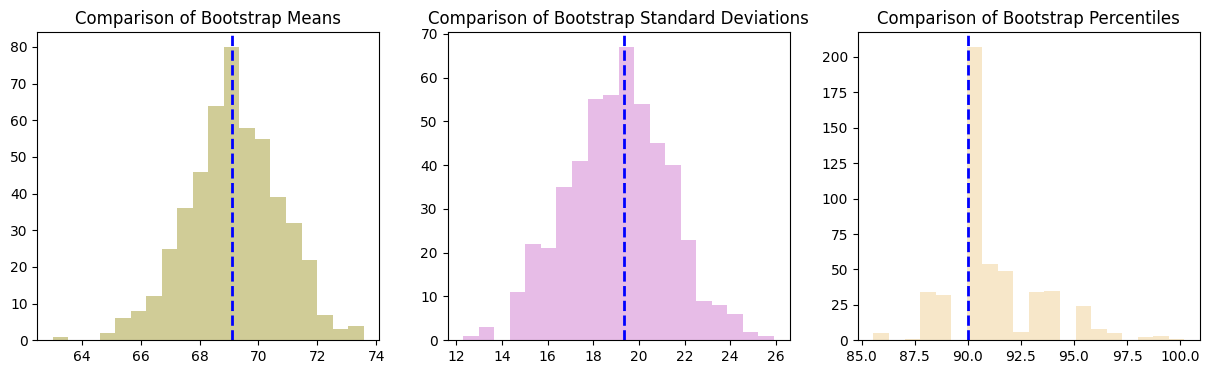

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].hist(bootstrap_means, bins=20, color='darkkhaki', alpha=0.7)
ax[0].axvline(population_mean_bp, color='blue', linestyle='dashed', linewidth=2)
ax[0].set_title('Comparison of Bootstrap Means')

ax[1].hist(bootstrap_std_devs, bins=20, color='plum', alpha=0.7)
ax[1].axvline(population_std_dev_bp, color='blue', linestyle='dashed', linewidth=2)
ax[1].set_title('Comparison of Bootstrap Standard Deviations')

ax[2].hist(bootstrap_percentiles, bins=20, color='wheat', alpha=0.7)
ax[2].axvline(population_percentile_bp, color='blue', linestyle='dashed', linewidth=2)
ax[2].set_title('Comparison of Bootstrap Percentiles')

plt.show()